# 介绍

Numpy 提供多维数组对象以及一系列操作数组的函数, 可以说其几乎是每一个Python科学计算软件的基础库。  

Numpy的核心数据结构是ndarray, 它用来存储具有相同数据类型的多维数组. 除了数据, ndarry也包含数组的shape, size, ndim, nbytes, dtype.

In [1]:
import numpy as np

In [3]:
d0 = np.array([[1, 2], [3, 4]])

In [4]:
type(d0), d0.shape, d0.size, d0.ndim, d0.dtype, d0.nbytes

(numpy.ndarray, (2, 2), 4, 2, dtype('int32'), 16)

为什么需要numpy? 速度! 简单! 

粗略比较一下速度.

In [5]:
a0 = np.arange(10000)
t0 = %timeit -o [i**2 for i in a0]

2.01 ms ± 52.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
a1 = np.arange(10000)
t1 = %timeit -o a1*2

8.37 µs ± 310 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
t0.best/t1.best

239.64160076212025

## 数据类型

ndarray元素的类型都是一样的，且是固定的，和Python不同。   

如何使用类型?  
一般指定int, float, complex 即可, 不需要细分int16, int32等

详细参考: [numpy datatypes](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

In [10]:
x = np.array([1, 2])    # Let numpy choose the datatype
y = np.array([1.0, 2.0])    # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)    # Force a particular datatype

x.dtype, y.dtype, z.dtype

(dtype('int32'), dtype('float64'), dtype('int64'))

In [12]:
z.nbytes * 8    # nbits

128

In [14]:
x1 = x+0.3
x1, x1.dtype

(array([1.3, 2.3]), dtype('float64'))

In [17]:
z[0] = 3.5
z    # 自动把元素变成int类型

array([3, 2], dtype=int64)

In [18]:
np.sqrt([-1, 2, 3])

C:\Users\Kd 鸿\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 1.41421356, 1.73205081])

In [19]:
np.sqrt([-1, 2, 3], dtype=np.complex)

array([0.        +1.j, 1.41421356+0.j, 1.73205081+0.j])

## 存储顺序

多维数组在内存中是连续储存的, 本质上可以看成是一维。

**如何将内存中数据映射到多维数组中？**   
取决于数组是按行存储的还是按列存储的. 例如有四个整数1,2,3,4, 那么:
* 按行存储就是: [[1, 2], [3, 4]]
* 按列存储就是: [[1, 3], [2, 4]]

Fotran是按列存储的, C是按行存储的.

In [20]:
a = np.arange(6, dtype=np.int8)
a

array([0, 1, 2, 3, 4, 5], dtype=int8)

按列储存

In [22]:
a1 = a.reshape(2, 3, order='F')    # 构造一个2*3数组，存储循序按照Fortran（按列）
a1

array([[0, 2, 4],
       [1, 3, 5]], dtype=int8)

按行存储

In [23]:
a2 = a.reshape(2, 3)
a2

array([[0, 1, 2],
       [3, 4, 5]], dtype=int8)

**什么时候需要考虑存储顺序?**

跟其他语言交互的时候, 比如调用`Fortran`(`Numpy`, `Scipy`中很多数值就是调用`Fortran`的, `Anconda`现在默认使用`intel mkl`也是`Fortran`的), 但是平常使用不需要关心顺序.

Numpy中使用`ndarray.strides`确定映射的顺序.

In [24]:
a1.strides

(1, 2)

In [25]:
a2.strides

(3, 1)

`strides`确定对应维度移动一个元素应内存中移动的字节数, 如对应a1, 有(1x1, 2x1), 对应a2, 有(3x1, 1x1).

某些操作, 如`transpose`, `reshape`, 只需要改变`strides`即可.

In [27]:
a = np.random.rand(10, 3)
a

array([[0.54754833, 0.41624704, 0.58569538],
       [0.01891775, 0.44868965, 0.35324191],
       [0.96531941, 0.23589575, 0.85964422],
       [0.94043555, 0.67266209, 0.31762271],
       [0.73277309, 0.09019851, 0.0168077 ],
       [0.4030581 , 0.07005273, 0.00537948],
       [0.98744642, 0.01493589, 0.57744736],
       [0.80640149, 0.7363113 , 0.37191322],
       [0.25609853, 0.82397007, 0.81151628],
       [0.33508394, 0.67947423, 0.73291429]])

In [28]:
a.strides

(24, 8)

In [30]:
b = a.transpose()
b

array([[0.54754833, 0.01891775, 0.96531941, 0.94043555, 0.73277309,
        0.4030581 , 0.98744642, 0.80640149, 0.25609853, 0.33508394],
       [0.41624704, 0.44868965, 0.23589575, 0.67266209, 0.09019851,
        0.07005273, 0.01493589, 0.7363113 , 0.82397007, 0.67947423],
       [0.58569538, 0.35324191, 0.85964422, 0.31762271, 0.0168077 ,
        0.00537948, 0.57744736, 0.37191322, 0.81151628, 0.73291429]])

In [31]:
b.strides

(8, 24)

## 帮助

In [ ]:
# 查看官方文档
np.ndarray?

In [124]:
# 查看源代码
# 注意：只有用python语言编写的才能查看，如果用c写的则无法查看
np.linspace??

## 参考

1. [Numerical Python: A Practical Techniques Approach for Industry](https://www.amazon.com/Numerical-Python-Practical-Techniques-Approach/dp/1484205545)
2. [Guide to NumPy, by the creator of Numpy](http://web.mit.edu/dvp/Public/numpybook.pdf)
3. [Scipy Lecture Notes](http://scipy-lectures.org/intro/numpy/)
4. [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/)

# 数组创建

## 用列表创建

In [33]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2, 3])

In [37]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
b

array([1, 2, 3])

In [38]:
a.shape, a.size, type(a), np.ndim(a)

((2, 3), 6, numpy.ndarray, 2)

In [39]:
b.shape, b.size, type(b), np.ndim(b)

((3,), 3, numpy.ndarray, 1)

In [41]:
len(a), len(b)    # 返回第一个维度的长度

(2, 3)

In [42]:
np.array([i for i in range(10) if i%2 == 0])

array([0, 2, 4, 6, 8])

## 使用`Numpy`函数创建

In [46]:
# Create an array of all zeros
np.zeros((2,3), dtype=np.int)

array([[0, 0, 0],
       [0, 0, 0]])

In [47]:
# Create an array of all ones
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [48]:
# Create a constant array
np.full((2, 3), 7)

array([[7, 7, 7],
       [7, 7, 7]])

In [49]:
# Create a 2*2 identity matrix
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [51]:
# Create an array filled with random values
np.random.random((2, 2))

array([[0.88075744, 0.1973602 ],
       [0.29297775, 0.49633489]])

In [55]:
np.arange(9).reshape(3,-1)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [56]:
np.linspace(0, 1.0, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [60]:
# 什么东西，和讲义不一样？？
np.tril(np.arange(0).reshape(3,-1))

array([], shape=(3, 0), dtype=int32)

In [62]:
np.random.rand(3, 3)

array([[0.49127342, 0.11437666, 0.17739414],
       [0.97104215, 0.90328076, 0.29897256],
       [0.16635466, 0.87765855, 0.11983568]])

## 从文件读取

In [64]:
!head test.dat
!wc test.dat

'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
'wc' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


没有这个文件，先跳过

# 索引和切片

[Numpy index](https://docs.scipy.org/doc/numpy/user/basics.indexing.html)

In [70]:
a = np.array([[i+j for j in range(6)] for i in range(0, 60, 10)])
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [76]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [75]:
np.arange(0, 60, 10).reshape(6,-1)

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50]])

In [77]:
np.arange(6) + np.arange(0, 60, 10).reshape(6,-1)

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

## 索引（indexing）

In [78]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [79]:
a[0, 0], a[1, 2]

(0, 12)

In [81]:
a[0, 2] = 3
a

array([[ 0,  1,  3,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

## 切片（slicing）

In [83]:
a

array([[ 0,  1,  3,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [86]:
a[:, 0], a[1, :], a[[1], :]

(array([ 0, 10, 20, 30, 40, 50]),
 array([10, 11, 12, 13, 14, 15]),
 array([[10, 11, 12, 13, 14, 15]]))

In [87]:
a[0, 2:4]

array([3, 3])

In [88]:
a[4:, 4:]

array([[44, 45],
       [54, 55]])

In [89]:
a[2::2, ::2]

array([[20, 22, 24],
       [40, 42, 44]])

## 整数数组索引（fancing index）

In [91]:
# 同时索引1，3行的所有元素
a[[1,3], :]

array([[10, 11, 12, 13, 14, 15],
       [30, 31, 32, 33, 34, 35]])

## 条件索引

前面的索引都是基于位置（坐标）的索引，而条件索引是基于元素值的索引。

In [93]:
a = np.random.random(10)*2    # random with (-1,1)
a

array([0.02270135, 1.88568962, 0.41015168, 1.45158109, 0.78558948,
       0.83668145, 1.10159274, 0.01773161, 1.35270949, 0.52493746])

In [94]:
a[a>0.3]

array([1.88568962, 0.41015168, 1.45158109, 0.78558948, 0.83668145,
       1.10159274, 1.35270949, 0.52493746])

In [95]:
a>0.3

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True])

## copies and views

[Views versus copies in NumPy](https://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html)  

建议: 当你不想改变原数组的时候使用`np.copy`。

In [96]:
a = np.arange(10)
b = a[::2]
b1 = a[5:]
c = a.copy()

In [99]:
# 共用同一内存意味着指向同一片内存空间
np.may_share_memory(a, b), np.may_share_memory(a, c), np.may_share_memory(b, b1)

(True, False, True)

In [102]:
a.base is c, b.base is a, b.base

(False, True, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

# 数组操作

[Numpy functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)

## 数学操作

In [104]:
x = np.random.random((3,3))
y = np.random.random((3,3))

print(x, '\n\n', y)

[[0.59862444 0.93556187 0.83528837]
 [0.1305258  0.70349191 0.00853612]
 [0.84484654 0.16698794 0.96724462]] 

 [[0.57335758 0.38038087 0.10756445]
 [0.1239177  0.56374474 0.62718005]
 [0.80895397 0.5254515  0.8690839 ]]


In [106]:
# 对应元素进行计算
x+y, x-y, x*y, x/y

(array([[1.17198202, 1.31594274, 0.94285282],
        [0.2544435 , 1.26723666, 0.63571617],
        [1.65380052, 0.69243944, 1.83632852]]),
 array([[ 0.02526686,  0.555181  ,  0.72772392],
        [ 0.0066081 ,  0.13974717, -0.61864393],
        [ 0.03589257, -0.35846356,  0.09816071]]),
 array([[0.34322586, 0.35586983, 0.08984734],
        [0.01617446, 0.39658987, 0.00535368],
        [0.68344197, 0.08774406, 0.84061673]]),
 array([[1.04406824, 2.45953978, 7.76546846],
        [1.05332649, 1.24789086, 0.01361031],
        [1.04436911, 0.31779896, 1.11294734]]))

In [107]:
np.sin(x), np.sqrt(y)

(array([[0.56350664, 0.8049326 , 0.74149003],
        [0.13015549, 0.64688452, 0.00853601],
        [0.74786925, 0.16621295, 0.82332497]]),
 array([[0.75720379, 0.61675025, 0.3279702 ],
        [0.35201946, 0.75082937, 0.791947  ],
        [0.89941869, 0.72488033, 0.9322467 ]]))

In [110]:
# 矩阵乘法，x.dot(y) in python2
x@y, x.dot(y)

(array([[1.13486838, 1.19402689, 1.37709213],
        [0.16891838, 0.4507247 , 0.46267463],
        [1.28754831, 0.92374217, 1.03622369]]),
 array([[1.13486838, 1.19402689, 1.37709213],
        [0.16891838, 0.4507247 , 0.46267463],
        [1.28754831, 0.92374217, 1.03622369]]))

In [112]:
x.T, x.T.T    # 转置

(array([[0.59862444, 0.1305258 , 0.84484654],
        [0.93556187, 0.70349191, 0.16698794],
        [0.83528837, 0.00853612, 0.96724462]]),
 array([[0.59862444, 0.93556187, 0.83528837],
        [0.1305258 , 0.70349191, 0.00853612],
        [0.84484654, 0.16698794, 0.96724462]]))

In [113]:
dir(x)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_e

## aggregate function

In [115]:
z = np.arange(6).reshape(2, 3)
z

array([[0, 1, 2],
       [3, 4, 5]])

最大值

In [116]:
np.max(z)

5

In [118]:
# 第0维度的最大值，也就是最大的行
np.max(z, axis=0)

array([3, 4, 5])

In [119]:
# 第1维度的最大值，也就是最大的列
np.max(z, axis=1)

array([2, 5])

求和

In [121]:
# 所有元素求和
np.sum(z)

15

In [122]:
# 按列求和
np.sum(z, axis=0)

array([3, 5, 7])

In [123]:
# 按行求和
np.sum(z, axis=1)

array([ 3, 12])

## 条件表达式

In [125]:
a = np.random.random(10)*2
a

array([1.96450077, 0.45707382, 0.92426734, 0.66774101, 0.03691693,
       1.33527111, 0.56654095, 1.48612799, 1.61520029, 0.76452729])

In [127]:
a>0.3

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [129]:
# 查看符合条件的元素的位置
np.where(a>0.3)

(array([0, 1, 2, 3, 5, 6, 7, 8, 9], dtype=int64),)

In [130]:
np.where((a>0.3) & (np.sin(a)>0.6))

(array([0, 2, 3, 5, 7, 8, 9], dtype=int64),)

In [131]:
a[np.where((a>0.3) & (np.sin(a)>0.6))]

array([1.96450077, 0.92426734, 0.66774101, 1.33527111, 1.48612799,
       1.61520029, 0.76452729])

In [133]:
# 求绝对值
# a>0则返回a，a<0则返回a*-1
np.select([a>0, a<0], [a, a*-1])

array([1.96450077, 0.45707382, 0.92426734, 0.66774101, 0.03691693,
       1.33527111, 0.56654095, 1.48612799, 1.61520029, 0.76452729])

## 广播（Broadcasting）

所谓的广播，简单来说就是在进行不同形状的数组计算时，`NumPy`会自动对两个数组进行补全，使得两者的形状相同，然后再进行数学运算。  
`NumPy`中的[universal functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html)（通用函数）都支持广播。

In [139]:
a = np.tile(np.arange(0, 40, 10), (3,1)).T
b = np.array([0, 1, 2])
c = np.empty_like(a)

print(a, '\n\n', b, '\n\n', c)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

 [0 1 2] 

 [[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


如果没有广播，要实现a+b的功能，只能通过下面的操作：

In [141]:
for i in range(a.shape[0]):
    c[i, :] = a[i, :] + b
c

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

而有了广播，我们只需要：

In [142]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [144]:
a = np.arange(0, 40, 10).reshape(4, 1)
b = np.array([0, 1, 2])
c = a + b

print(a, '\n\n', b, '\n\n', c)

[[ 0]
 [10]
 [20]
 [30]] 

 [0 1 2] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


## 数组形状操作

In [146]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [147]:
# 
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [149]:
# 
a.flatten()

array([1, 2, 3, 4, 5, 6])

In [151]:
a.reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [153]:
a.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [154]:
a.reshape(3, -1)    # -1的意思是numpy会根据元素个数自动计算此处应该为多少

array([[1, 2],
       [3, 4],
       [5, 6]])

In [155]:
a = np.array([[1,2], [3,4]])
b = np.array([[5, 6]])

print(a, '\n\n', b)

[[1 2]
 [3 4]] 

 [[5 6]]


In [158]:
np.concatenate((a, b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [160]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [164]:
a1 = np.arange(4)
b1 = a1 + 2
c1 = a1 + 3

print(a1, '\n\n', b1, '\n\n', c1)

[0 1 2 3] 

 [2 3 4 5] 

 [3 4 5 6]


In [166]:
np.vstack((a1, b1, c1))

array([[0, 1, 2, 3],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

In [168]:
np.hstack((a1, b1, c1))

array([0, 1, 2, 3, 2, 3, 4, 5, 3, 4, 5, 6])

# 例子——康威生命游戏

1. 当前细胞为存活状态时，当周围低于2个（不包含2个）存活细胞时， 该细胞变成死亡状态。（模拟生命数量稀少）
2. 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
3. 当前细胞为存活状态时，当周围有3个以上的存活细胞时，该细胞变成死亡状态。（模拟生命数量过多）
4. 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）



In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Python实现

In [32]:
# 构建初始状态
Z = [[0, 1, 0, 0],
     [0, 0, 1, 0],
     [1, 1, 1, 0],
     [0, 0, 0, 0]]

Z1 = np.zeros((6, 6), dtype=int)
Z1[1:-1, 1:-1] = Z
Z = Z1
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [18]:
# 计算邻居数量
def compute_neighbours(Z):
    shape = len(Z), len(Z[0])
    N = [[0,] *  shape[0] for i in range(shape[1])]
    for x in range(1, shape[0]-1):
        for y in range(1, shape[1]-1):
            # 分别统计每个元素四周的邻居数量
            N[x][y] = Z[x-1][y-1] + Z[x][y-1] + Z[x+1][y-1] \
                    + Z[x-1][y]               + Z[x+1][y] \
                    + Z[x-1][y+1] + Z[x][y+1] + Z[x+1][y+1]
    return N

In [19]:
N = compute_neighbours(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 1, 2, 1, 0],
 [0, 3, 5, 3, 2, 0],
 [0, 1, 3, 2, 2, 0],
 [0, 2, 3, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

In [20]:
def iterate(Z):
    N = compute_neighbours(Z)
    shape = len(Z), len(Z[0])
    for x in range(1, shape[0]-1):
        for y in range(1, shape[1]-1):
            # 生命太多或太少，活—>死
            if Z[x][y] == 1 and (N[x][y]<2 or N[x][y]>3):
                Z[x][y] = 0
            # 繁殖
            elif Z[x][y] == 0 and N[x][y] > 3:
                Z[x][y] = 1
    return Z

In [21]:
Z = iterate(Z)
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

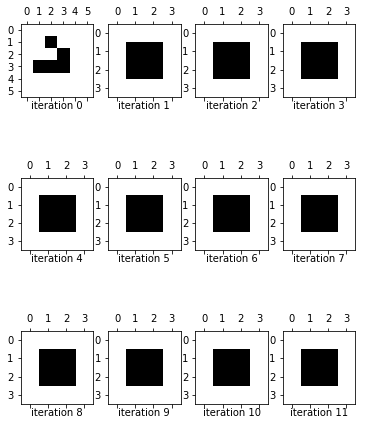

In [33]:
# 画图
fig, axes = plt.subplots(3, 4, figsize=(6, 8))
axes = axes.flatten()

axes[0].matshow(Z, cmap='Greys')
axes[0].set_xlabel('iteration %s' % 0)

for i in range(1, 12):
    Z = iterate(Z)
    axes[i].matshow(np.array(Z)[1:-1, 1:-1], cmap='Greys')
    axes[i].set_xlabel('iteration %s' % i)

## NumPy实现1

In [34]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [35]:
# 计算邻居数量
def compute_neighbours(Z):
    N = np.zeros(Z.shape, dtype=int)
    N[1:-1, 1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                      Z[1:-1, :-2]                + Z[1:-1,2:] +
                      Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])
    return N

In [36]:
N = compute_neighbours(Z)
N

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 2, 2, 1, 0],
       [0, 2, 3, 3, 2, 0],
       [0, 2, 3, 3, 2, 0],
       [0, 1, 2, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [37]:
# Flatten arrays
N_ = N.ravel()
Z_ = Z.ravel()

# Apply rules
# 当前细胞为存活状态时，当周围低于2个（不包含2个）存活细胞时， 该细胞变成死亡状态。（模拟生命数量稀少）
R1 = np.argwhere( (Z_==1) & (N_ < 2) )
# 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
R2 = np.argwhere( (Z_==1) & (N_ > 3) )
# 当前细胞为存活状态时，当周围有3个以上的存活细胞时，该细胞变成死亡状态。（模拟生命数量过多）
R3 = np.argwhere( (Z_==1) & ((N_==2) | (N_==3)) )
# 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）
R4 = np.argwhere( (Z_==0) & (N_==3) )

# Set new values
Z_[R1] = 0
Z_[R2] = 0
Z_[R3] = Z_[R3]
Z_[R4] = 1

# Make sure borders stay null
Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0

In [38]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

## NumPy实现2

In [39]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

Z1 = np.zeros((6, 6), dtype=int)
Z1[1:-1, 1:-1] = Z

Z = Z1
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [40]:
N = np.zeros(Z.shape, dtype=int)
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

# 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
birth = (N==3)[1:-1,1:-1] & (Z[1:-1,1:-1]==0)
# 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）
survive = ((N==2) | (N==3))[1:-1,1:-1] & (Z[1:-1,1:-1]==1)

Z[...] = 0    # 先将全部设置为死亡
Z[1:-1,1:-1][birth | survive] = 1    # 再将这两种条件设置为存活

In [41]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])